# 📦 1. Import Libraries


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 📊 2. Load and Explore the Data


<Axes: title={'center': 'Energy Demand'}, xlabel='date'>

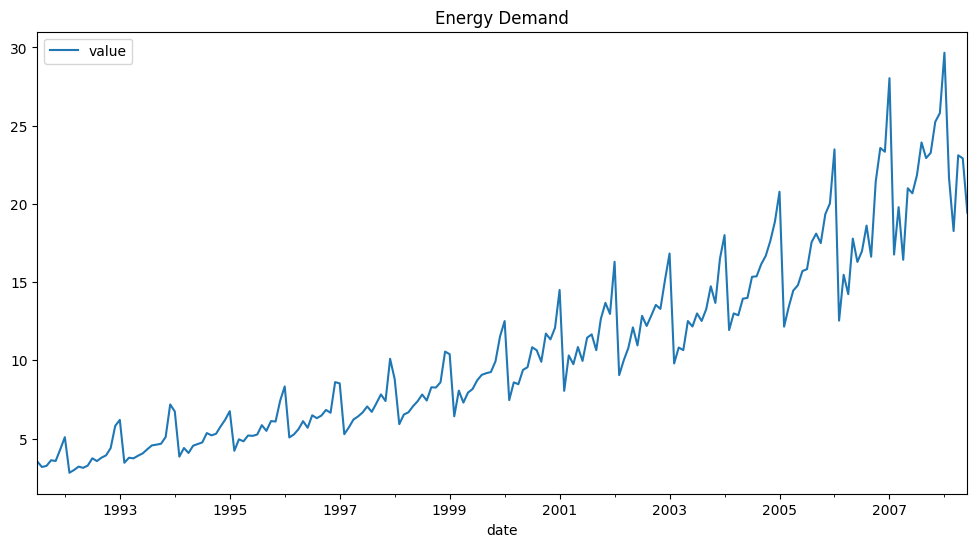

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.plot(figsize=(12,6), title='Energy Demand')

# 🧼 3. Preprocessing


In [7]:
df['prev'] = df['value'].shift(1)
df.dropna(inplace=True)

# 🧪 4. Train/Test Split

In [8]:
X = df[['prev']]
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# 🔍 5. Model Training


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 📈 6. Predictions + Plotting


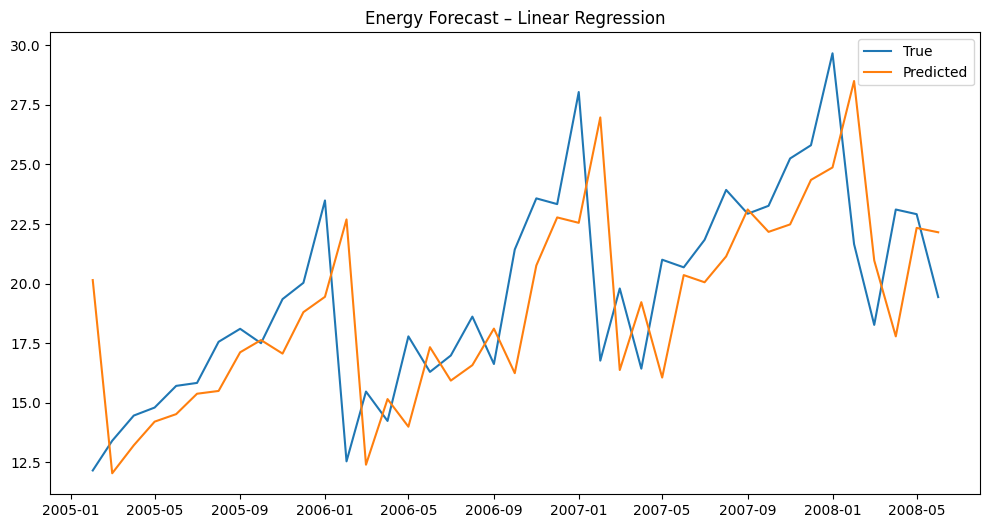

In [10]:
y_pred = model.predict(X_test)
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='True')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title("Energy Forecast – Linear Regression")
plt.legend()
plt.show()


# 📋 7. Model Evaluation

In [12]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 14.213652631057792


### 🧠 Model Observations

- Model: Linear Regression using lagged values
- MSE: 14 → RMSE ≈ 3.74
- The model captures the trend, but struggles with sharp spikes or drops
- Good starting point — will try more advanced models (like XGBoost, Prophet, or LSTM) next
